In [1]:
pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 649.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.7 MB/s eta 0:00:00


In [3]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

##데이터 가져오고 수정하기

#### 4. ETF 유니버스 데이터 처리



#### 심명보의 포트폴리오

| Ticker | Sector |
| ------ | -----  |
| 153130 | 원화 현금 |
| BIL | 달러 현금 |
| VNQ | 부동산 |
| PDBC | 원자재 |
| INDA | 인도 주가지수 |
| VNM | 베트남 주가지수 |
| QQQ | 미국 나스닥 100 |
| SPY | 미국 S&P 500 |
| VGSH | 미국채 단기 |
| TLT | 미국채 장기     |
| GLD |  금  |


In [5]:
tickers =  ['153130.KS','BIL', 'VNQ', 'PDBC', 'INDA', 'VNM', 'QQQ', 'SPY', 'VGSH', 'TLT', 'GLD']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)['Close']
data = data.resample('3M').last()

[*********************100%***********************]  11 of 11 completed


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
#데이터가 어떻게 생겼는지 확인해보기 위해 plot graph 만들어보자!
P0 = data.iloc[0]

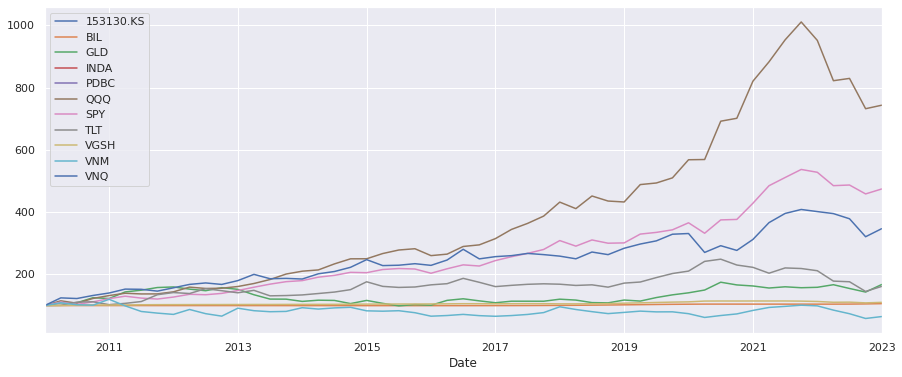

In [7]:
#The idea behind this operation is to compare the behavior of the four different stocks as if they were all starting from the same value = 100
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

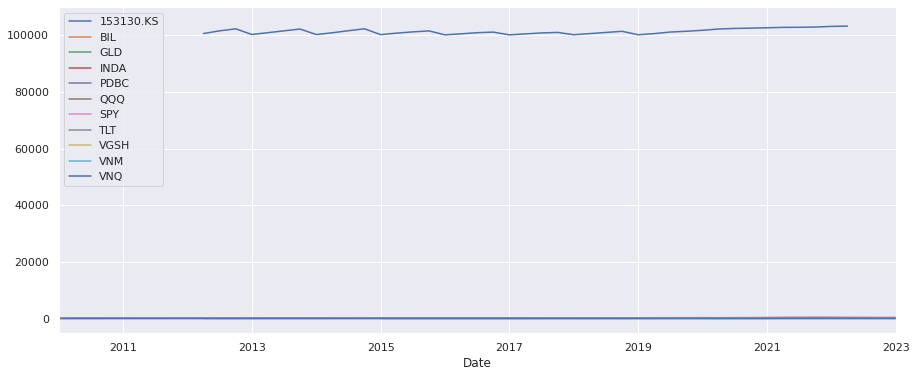

In [8]:
#만약 정규화를 시켜주지 않고 그냥 그래프로 표현한다면?
data.plot(figsize=(15,6))
plt.show

##포트폴리오 수익률 계산

###Simple rate of return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [9]:
data

,153130.KS,BIL,GLD,INDA,PDBC,QQQ,SPY,TLT,VGSH,VNM,VNQ
Date,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,86.303894,105.959999,NaN,NaN,37.857403,83.818024,65.647438,52.779453,19.787378,25.480665
2010-04-30 00:00:00+00:00,NaN,86.247467,115.360001,NaN,NaN,43.610378,93.113182,66.205177,52.879707,21.535469,31.763458
2010-07-31 00:00:00+00:00,NaN,86.266266,115.489998,NaN,NaN,40.729362,86.831436,72.924942,53.447372,20.305334,31.236023
2010-10-31 00:00:00+00:00,NaN,86.285088,132.619995,NaN,NaN,46.501514,93.803749,73.608170,53.793980,20.038263,33.744102
2011-01-31 00:00:00+00:00,NaN,86.266266,129.869995,NaN,NaN,50.004749,102.406502,67.540672,53.676735,23.772381,35.752136
2011-04-30 00:00:00+00:00,NaN,86.266266,152.369995,NaN,NaN,52.829437,109.045792,70.281761,53.764549,19.591719,38.947956
2011-07-31 00:00:00+00:00,NaN,86.285088,158.289993,NaN,NaN,51.980019,103.883385,74.133072,54.142288,16.017668,38.777908
2011-10-31 00:00:00+00:00,NaN,86.228668,167.339996,NaN,NaN,52.031536,101.328529,88.512215,54.287075,14.984797,37.294220
2012-01-31 00:00:00+00:00,NaN,86.213593,169.309998,NaN,NaN,54.556004,106.700035,93.074501,54.355633,14.166875,40.016445


In [10]:
#수익률 계산
rets = data.pct_change().fillna(0)

In [11]:
rets

,153130.KS,BIL,GLD,INDA,PDBC,QQQ,SPY,TLT,VGSH,VNM,VNQ
Date,,,,,,,,,,,
2010-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-30 00:00:00+00:00,0.000000,-0.000654,0.088713,0.000000,0.000000,0.151964,0.110897,0.008496,0.001899,0.088344,0.246571
2010-07-31 00:00:00+00:00,0.000000,0.000218,0.001127,0.000000,0.000000,-0.066063,-0.067464,0.101499,0.010735,-0.057121,-0.016605
2010-10-31 00:00:00+00:00,0.000000,0.000218,0.148325,0.000000,0.000000,0.141720,0.080297,0.009369,0.006485,-0.013153,0.080294
2011-01-31 00:00:00+00:00,0.000000,-0.000218,-0.020736,0.000000,0.000000,0.075336,0.091710,-0.082430,-0.002180,0.186349,0.059508
2011-04-30 00:00:00+00:00,0.000000,0.000000,0.173250,0.000000,0.000000,0.056488,0.064833,0.040584,0.001636,-0.175862,0.089388
2011-07-31 00:00:00+00:00,0.000000,0.000218,0.038853,0.000000,0.000000,-0.016079,-0.047342,0.054798,0.007026,-0.182427,-0.004366
2011-10-31 00:00:00+00:00,0.000000,-0.000654,0.057174,0.000000,0.000000,0.000991,-0.024593,0.193964,0.002674,-0.064483,-0.038261
2012-01-31 00:00:00+00:00,0.000000,-0.000175,0.011772,0.000000,0.000000,0.048518,0.053011,0.051544,0.001263,-0.054583,0.072993


##변동성

In [12]:
#색깔 팔레트
pal = sns.color_palette('Spectral', len(tickers))

In [14]:
#가중치 계산 함수
def get_ew_weights(rets):
  noa = len(rets.columns)
  weights = np.ones_like(rets) * (1/noa)
  return weights

weights = get_ew_weights(rets)[-1]
weights

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

<function matplotlib.pyplot.show(*args, **kw)>

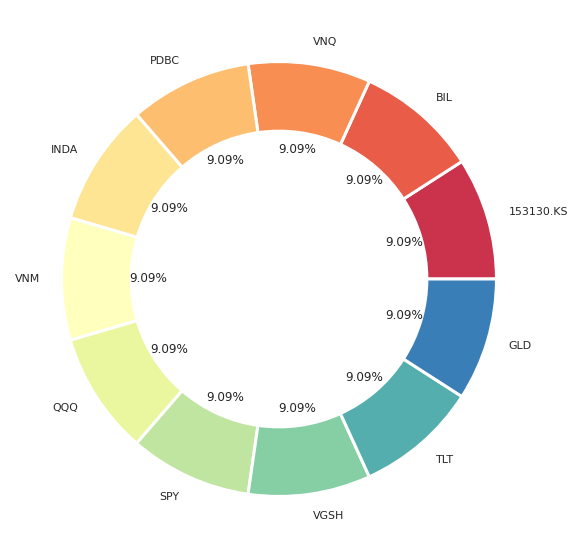

In [15]:
# 파이차트 시각화
plt.figure(figsize=(10,10))
wedgeprops = {'width' : 0.32, 'edgecolor':'w', 'linewidth':3}
plt.pie(weights, labels=tickers, autopct='%.2f%%', wedgeprops=wedgeprops, colors=pal)
plt.show

Text(0, 0.5, 'Weights')

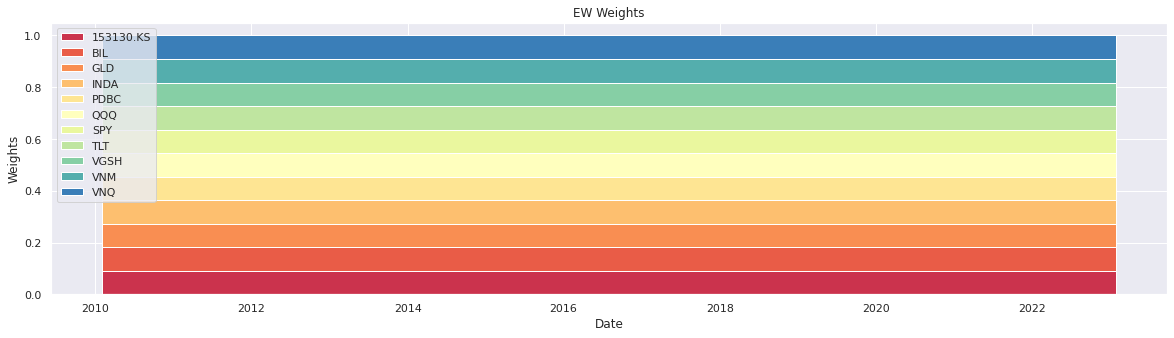

In [19]:
# 시계열 가중치 데이터프레임
ew_w_df = pd.DataFrame(get_ew_weights(rets), index=rets.index, columns=rets.columns)

# 그래프 결과
plt.figure(figsize=(20,5))
plt.stackplot(ew_w_df.index, ew_w_df.T, labels=ew_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('EW Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

Text(0, 0.5, 'Returns')

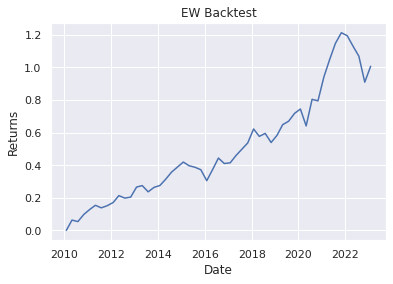

In [22]:
port_rets = rets.mean(axis=1)

# 포트폴리오 누적수익률
port_cum_rets = (1 + port_rets).cumprod() - 1

# 그래프 결과
plt.plot(port_cum_rets)
plt.title('EW Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')

베트남 주식은 거의 전구간에서 수익률이 낮은 모습을 보여주므로,

제거하고 다른 주가지수를 넣는 것이 좋아보임 or 개도국 전체 주가지수를 이용하는 방법도 있음